In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from astropy.io import fits
from astropy import units as u
from astropy.visualization import simple_norm
from dust_extinction.averages import RRP89_MWGC, CT06_MWGC, F11_MWGC
from dust_extinction.parameter_averages import CCM89
import importlib as imp

In [2]:
pwd

'/blue/adamginsburg/savannahgramze/proposals/sagittariusE'

In [ ]:
cd /orange/adamginsburg/jwst/cloudc/lactea-filament/lactea-filament/

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament


In [4]:
import isochrone_plots as isop

In [5]:
imp.reload(isop)

<module 'isochrone_plots' from '/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament/isochrone_plots.py'>

In [6]:
cd /blue/adamginsburg/savannahgramze/proposals/sagittariusE

/blue/adamginsburg/savannahgramze/proposals/sagittariusE


# Tables

In [7]:
sanders = Table.read('/orange/adamginsburg/cmz/sgre/sgrE.csv')

In [8]:
mist = Table.read(f'/orange/adamginsburg/jwst/brick/isochrones/MIST_iso_633a08f2d8bb1.iso.cmd',
                  header_start=12, data_start=13, format='ascii', delimiter=' ', comment='#')
mist['410M405'] = mist['F410M']
mist['405M410'] = mist['F405N']

In [9]:
trilegal_nircam = Table.read('/orange/adamginsburg/cmz/sgre/trilegal_nircam.dat', format='ascii.csv', delimiter=' ')

# Figures?

In [10]:
distance_modulus = 5*np.log10(8500)-5
distance_modulus

14.647094628571466

## Isochrone on CMD

Text(0, 0.5, 'K')

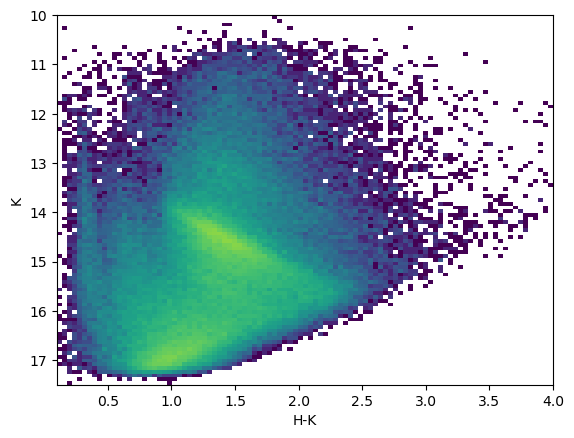

In [11]:
## CMD
bins = [np.linspace(0.1,4,100), np.linspace(10, 17.5,100)]
cm = cm = plt.cm.viridis.copy()
cm.set_under((0,0,0,0))
plt.hist2d(sanders['phot_h_mean_mag']-sanders['phot_ks_mean_mag'],
          sanders['phot_ks_mean_mag'], bins=bins,# vmax=500, vmin=1,
          norm=simple_norm(data=[], vmin=1, vmax=1000, stretch='log'), cmap=cm);
plt.ylim(plt.ylim()[::-1])
plt.xlabel('H-K')
plt.ylabel('K')

In [12]:
## Isochrone
age = np.log10((5*u.Myr).to(u.yr).value)
isochrone = isop.get_sgre_isochrone(distance=8.5*u.kpc, age=6.5, Av=30, ext=CT06_MWGC(), phase=3)
isochrone_jwst = isop.get_mist_isochrone(distance=8.5*u.kpc, age=6.5, Av=30, ext=CT06_MWGC(), phase=3)

(<Axes: xlabel='VISTA_H - VISTA_KS', ylabel='VISTA_KS'>,
 <matplotlib.collections.PathCollection at 0x154c7f1f8320>)

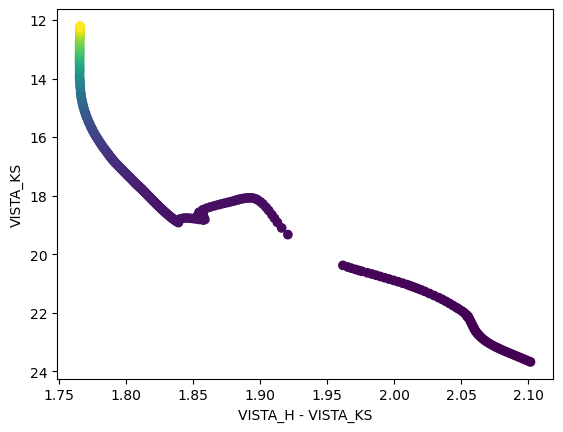

In [13]:
Hband = isochrone.table['VISTA_H']
isochrone.plot_ext_CMD('VISTA_H', 'VISTA_Ks', 'VISTA_Ks', wavelengths=[16458.24*u.Angstrom, 21479.56*u.Angstrom, 21479.56*u.Angstrom], c=isochrone.table['initial_mass'])

(<Axes: xlabel='F182M - F410M', ylabel='F182M'>,
 <matplotlib.collections.PathCollection at 0x154c7f1990d0>)

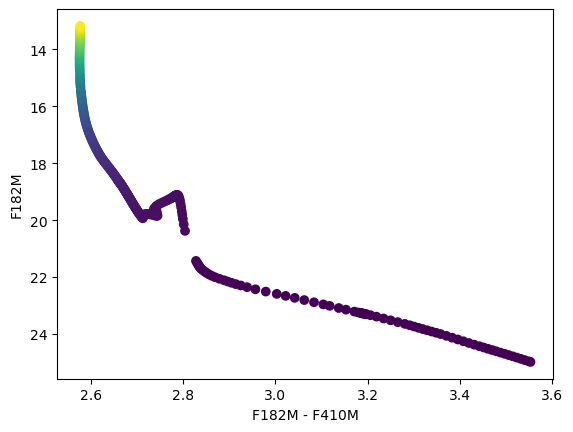

In [14]:
isochrone_jwst.plot_ext_CMD('F182M', 'F410M', 'F182M', wavelengths=[1.82*u.micron, 4.10*u.micron, 1.82*u.micron], c=isochrone_jwst.table['initial_mass'])

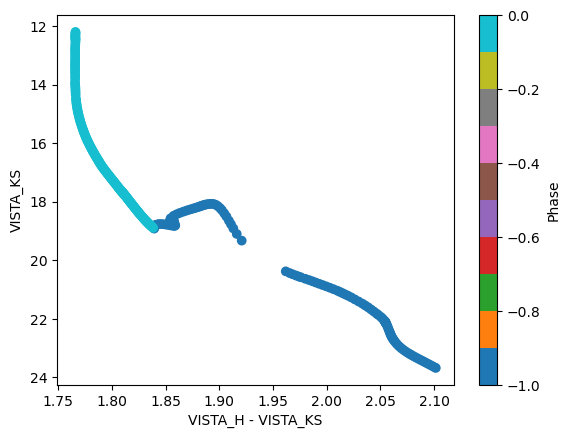

In [15]:
ax, im = isochrone.plot_ext_CMD('VISTA_H', 'VISTA_Ks', 'VISTA_Ks', wavelengths=[16458.24*u.Angstrom, 21479.56*u.Angstrom, 21479.56*u.Angstrom], c=isochrone.table['phase'], cmap='tab10')
plt.colorbar(im, label='Phase')

In [16]:
pwd

'/blue/adamginsburg/savannahgramze/proposals/sagittariusE'

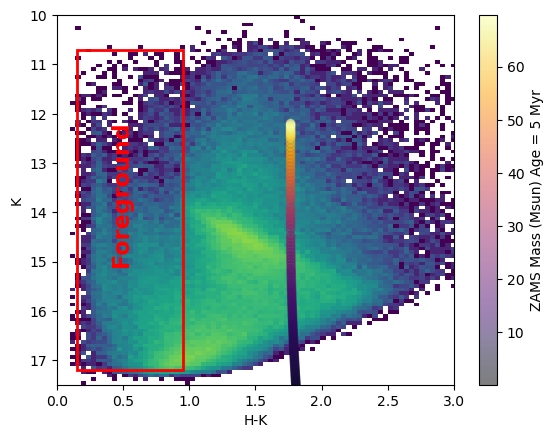

In [18]:
plt.hist2d(sanders['phot_h_mean_mag']-sanders['phot_ks_mean_mag'],
          sanders['phot_ks_mean_mag'], bins=bins,# vmax=500, vmin=1,
          norm=simple_norm(data=[], vmin=1, vmax=1000, stretch='log'), cmap=cm);



ax, im = isochrone.plot_ext_CMD('VISTA_H', 'VISTA_Ks', 'VISTA_Ks', wavelengths=[16458.24*u.Angstrom, 21479.56*u.Angstrom, 21479.56*u.Angstrom], c=isochrone.table['initial_mass'], cmap='inferno', alpha=0.5)
#plt.ylim(plt.ylim()[::-1])
plt.xlabel('H-K')
plt.ylabel('K')
rect = plt.Rectangle((0.15, 10.7), 0.8, 6.5, linewidth=2, edgecolor='r', facecolor='none')
plt.text(0.4, 15, 'Foreground', color='red', fontsize=16, weight='bold', rotation=90)
ax.add_patch(rect)
plt.colorbar(im, label='ZAMS Mass (Msun) Age = 5 Myr') 
ax.set_xlim(0, 3)
plt.savefig('cmd_sgre_isochrone.png', dpi=300, bbox_inches='tight')
plt.savefig('cmd_sgre_isochrone.pdf', bbox_inches='tight')

## Isochrone on Trilegal

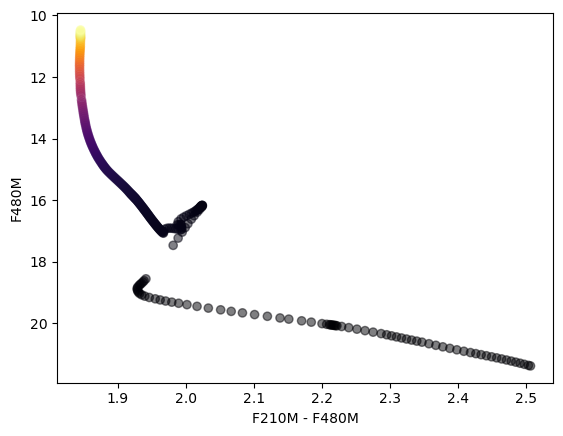

In [19]:
ax, im = isochrone_jwst.plot_ext_CMD('F210M', 'F480M', 'F480M', wavelengths=[2.10*u.micron, 4.80*u.micron, 4.8*u.micron], c=isochrone_jwst.table['initial_mass'], cmap='inferno', alpha=0.5)


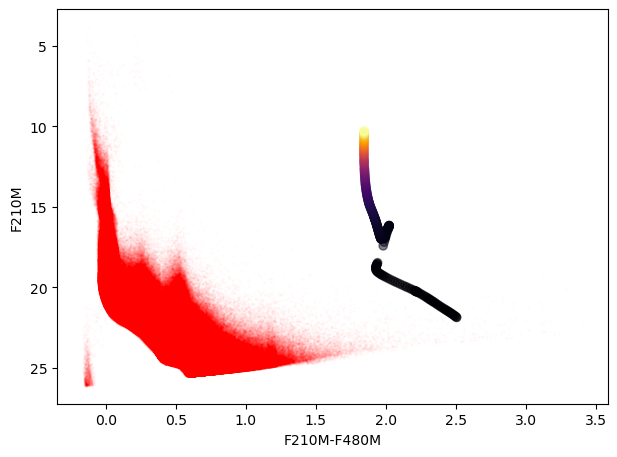

In [20]:
plt.scatter(trilegal_nircam['F210M'] - trilegal_nircam['F480M'],
          trilegal_nircam['F210M'],
          color='red',
          alpha=0.01,
          s=1
          )
band1 = 'F210M'
band2 = 'F480M'
band3 = 'F210M'
#plt.scatter(isochrone_jwst.band(band1) - isochrone_jwst.band(band2), isochrone_jwst.band(band3)+distance_modulus, c=isochrone_jwst.table['initial_mass'], alpha=0.5)

isochrone_jwst.plot_ext_CMD('F210M', 'F480M', 'F210M', wavelengths=[2.10*u.micron, 4.80*u.micron, 4.8*u.micron], c=isochrone_jwst.table['initial_mass'], cmap='inferno', alpha=0.5)

#plt.ylim(plt.ylim()[::-1])
#plt.axhline(0, linestyle='--', color='k')
#plt.axvline(0, linestyle='--', color='k')
plt.xlabel("F210M-F480M")
plt.ylabel("F210M")
#pl.axis([-0.2,0.1,-0.1,0.3])
#plt.ylim(25,5)
#plt.xlim([-0.2, 0.3]);
#agesel.sum()
plt.rcParams.update({'font.size': 14})
plt.tight_layout()